In [20]:
from Bio.PDB import PDBParser, NeighborSearch
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
pdb_code = "1ACJ"
filename = f"{pdb_code}.pdb"
parser = PDBParser(QUIET=True)
structure = parser.get_structure(pdb_code, filename)
model = structure[0]
chain = model["A"]
residues = [res for res in chain if 200 <= res.get_id()[1] <= 210]
atoms = [atom for res in residues for atom in res]
G = nx.Graph()
# cada atomo tem uma posicao no espaço 3D representado por um vetor
# coords =  matriz de dimensão N x 3 onde N é o numero de átomos
#xi =(xi, yi​, zi​ )∈ R3
coords = np.array([atom.coord for atom in atoms])


In [12]:
for i, atom in enumerate(atoms):
    G.add_node(i, label=atom.get_name(), element=atom.element)
    

In [ ]:
cutoff = 2.0
for i in range(len(atoms)):
    for j in range(i+1, len(atoms)):
        #distância euclidiana 
        # p decidir se dois atomos estao conectados no grafo, calcula-se a distencia entre seus vetores
        # dij​=∥xi​−xj​∥=(xi​−xj​)2+(yi​−yj​)2+(zi​−zj​)2    
        dist = np.linalg.norm(coords[1] - coords[j])
        if dist < cutoff:
            G.add_edge(i, j)

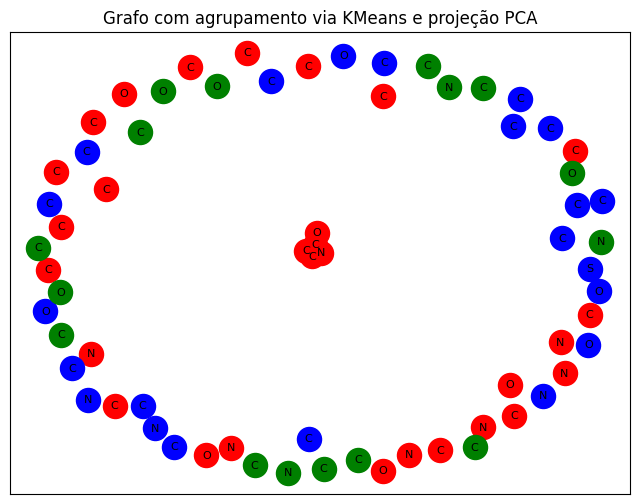

In [ ]:
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)
colors = ['red', 'blue', 'green']
elements = [atom.element for atom in atoms]
for i in range(len(atoms)):
    nx.draw_networkx_nodes(G, pos, nodelist=[i], node_color=colors[clusters[i]], label=elements[i], node_size=300)
nx.draw_networkx_edges(G, pos, alpha=0.4)
nx.draw_networkx_labels(G, pos, labels={i: elements[i] for i in range(len(atoms))}, font_size=8)
plt.title("Grafo com agrupamento via KMeans e projeção PCA")
plt.show()


In [14]:
A = nx.adjacency_matrix(G).toarray()
print("Matriz de adjacência (dimensão: {}x{}):\n".format(*A.shape), A)

Matriz de adjacência (dimensão: 67x67):
 [[0 1 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


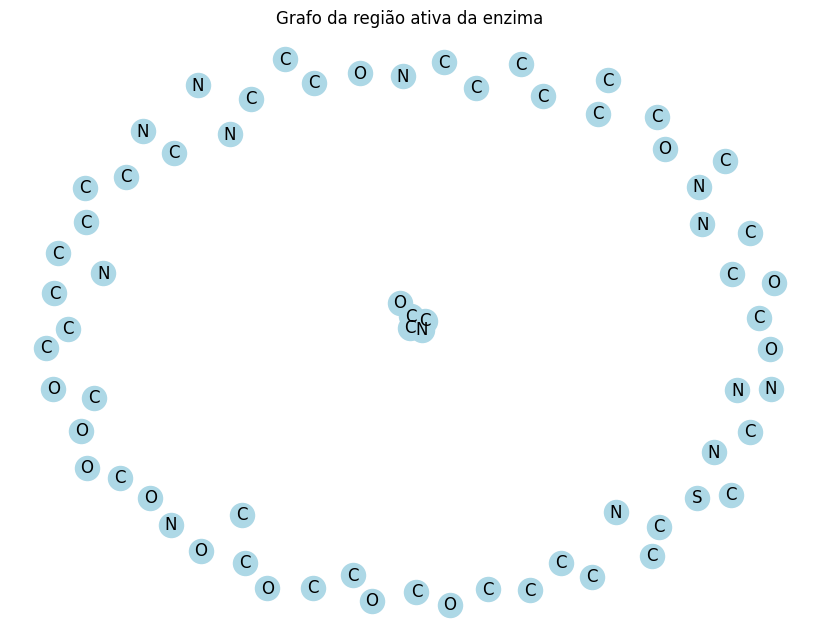

In [15]:
labels = nx.get_node_attributes(G, 'element')
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, labels=labels, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Grafo da região ativa da enzima")
plt.show()

In [ ]:
#transformar coordenadas 3d em 2d
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)
pca = PCA(n_components=2)
coords_pca = pca.fit_transform(coords_scaled)

print("Coordenadasd reduzidas via PCA", coords_pca)

Coordenadasd reduzidas via PCA [[ 2.426771    1.0360817 ]
 [ 2.3030264   0.7788225 ]
 [ 1.9012923   0.38195387]
 [ 1.6043885   0.6106021 ]
 [ 2.6669948   0.4698551 ]
 [ 2.5916524   0.18846776]
 [ 1.8954343  -0.22358589]
 [ 1.5201371  -0.6275746 ]
 [ 1.4166427  -0.69455236]
 [ 1.061693   -0.8070688 ]
 [ 1.5566598  -1.2779737 ]
 [ 1.7341087  -0.6144754 ]
 [ 1.6546245  -0.65389895]
 [ 1.4135731  -0.09445127]
 [ 1.09674    -0.14862698]
 [ 1.5586681   0.46514112]
 [ 1.3378428   1.0191712 ]
 [ 0.9021344   0.97757256]
 [ 0.6080528   1.2057709 ]
 [ 0.8542188   0.67404306]
 [ 0.43758956  0.6169488 ]
 [ 0.1690388   0.13618258]
 [-0.1990106   0.20533942]
 [ 0.4386907   0.43878302]
 [ 0.3575893  -0.35491294]
 [ 0.13338602 -0.82796633]
 [-0.0227887  -0.5295031 ]
 [-0.37445822 -0.6333878 ]
 [ 0.42413077 -1.3523867 ]
 [ 0.4877662  -1.7185277 ]
 [ 0.25258708 -0.13694906]
 [ 0.15123229  0.19196595]
 [-0.23806174  0.54445106]
 [-0.54600585  0.47133905]
 [ 0.53492856  0.6138775 ]
 [ 0.4492118   1.1308744

In [21]:
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(coords_pca)

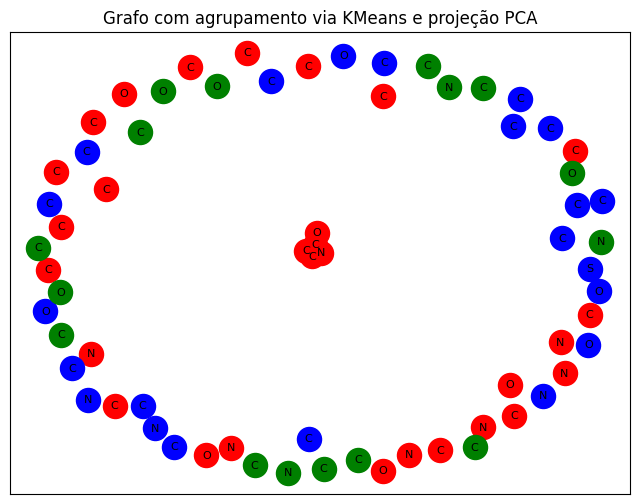

In [24]:
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)
colors = ['red', 'blue', 'green']
elements = [atom.element for atom in atoms]
for i in range(len(atoms)):
    nx.draw_networkx_nodes(G, pos, nodelist=[i], node_color=colors[clusters[i]], label=elements[i], node_size=300)
nx.draw_networkx_edges(G, pos, alpha=0.4)
nx.draw_networkx_labels(G, pos, labels={i: elements[i] for i in range(len(atoms))}, font_size=8)
plt.title("Grafo com agrupamento via KMeans e projeção PCA")
plt.show()
